In [1]:
# Step 0. Load libraries and IPython configurations
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Step 1. Load images
dataset = tc.image_analysis.load_images('Cell_Images', with_path = True)

Read 6442 images in 5.00054 secs	speed: 1288.26 file/sec

Read 12883 images in 10.0009 secs	speed: 1288.09 file/sec

Read 19752 images in 15.0022 secs	speed: 1373.45 file/sec

Read 26212 images in 20.0027 secs	speed: 1291.87 file/sec

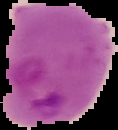

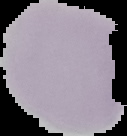

In [3]:
image_sarray = dataset['image']
image_sarray[10000].show()
image_sarray[20000].show()

In [4]:
resized_images = tc.image_analysis.resize(image_sarray,224,224)

In [5]:
dataset['image'] = resized_images

In [6]:
dataset.head()

path,image
/Users/tixm/Documents/Data_Projects/Python/Mal ...,Height: 224 Width: 224
/Users/tixm/Documents/Data_Projects/Python/Mal ...,Height: 224 Width: 224
/Users/tixm/Documents/Data_Projects/Python/Mal ...,Height: 224 Width: 224
/Users/tixm/Documents/Data_Projects/Python/Mal ...,Height: 224 Width: 224
/Users/tixm/Documents/Data_Projects/Python/Mal ...,Height: 224 Width: 224
/Users/tixm/Documents/Data_Projects/Python/Mal ...,Height: 224 Width: 224
/Users/tixm/Documents/Data_Projects/Python/Mal ...,Height: 224 Width: 224
/Users/tixm/Documents/Data_Projects/Python/Mal ...,Height: 224 Width: 224
/Users/tixm/Documents/Data_Projects/Python/Mal ...,Height: 224 Width: 224
/Users/tixm/Documents/Data_Projects/Python/Mal ...,Height: 224 Width: 224


In [9]:
dataset['label'] = dataset['path'].apply(lambda path: 'malaria' if '/Parasitized' in path else 'not malaria')

In [10]:
dataset.head()

path,image,label
/Users/tixm/Documents/Data_Projects/Python/Mal ...,Height: 224 Width: 224,malaria
/Users/tixm/Documents/Data_Projects/Python/Mal ...,Height: 224 Width: 224,malaria
/Users/tixm/Documents/Data_Projects/Python/Mal ...,Height: 224 Width: 224,malaria
/Users/tixm/Documents/Data_Projects/Python/Mal ...,Height: 224 Width: 224,malaria
/Users/tixm/Documents/Data_Projects/Python/Mal ...,Height: 224 Width: 224,malaria
/Users/tixm/Documents/Data_Projects/Python/Mal ...,Height: 224 Width: 224,malaria
/Users/tixm/Documents/Data_Projects/Python/Mal ...,Height: 224 Width: 224,malaria
/Users/tixm/Documents/Data_Projects/Python/Mal ...,Height: 224 Width: 224,malaria
/Users/tixm/Documents/Data_Projects/Python/Mal ...,Height: 224 Width: 224,malaria
/Users/tixm/Documents/Data_Projects/Python/Mal ...,Height: 224 Width: 224,malaria


In [11]:
train2_data, test_data = dataset.random_split(0.8)
train_data, validate_data = train2_data.random_split(0.8)

In [13]:
model = tc.image_classifier.create(train_data, target = 'label', max_iterations = 100, 
                                   validation_set = validate_data, model = 'squeezenet_v1.1')

Downloading base mlmodel

Downloading https://docs-assets.developer.apple.com/coreml/models/SqueezeNet.mlmodel to /var/folders/3s/fbxlt7n936n42xxcgdmp7h9m0000gn/T/model_cache/squeezenet_v1.1.mlmodel

Using GPU (Intel(R) Iris(TM) Pro Graphics 6200) to extract features.

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 2.67s        | 0.25%            |

| 128              | 3.11s        | 0.5%             |

| 192              | 3.59s        | 1%               |

| 256              | 4.03s        | 1.25%            |

| 320              | 4.45s        | 1.75%            |

| 640              | 6.55s        | 3.5%             |

| 1280             | 10.80s       | 7%               |

| 1920             | 15.01s       | 10.75%           |

| 2560             | 19.21s       | 14.25%           |

| 3200             | 23.42s       | 18%              |

| 3840             | 27.63s       | 21.5%            |

| 4480             | 31.84s       | 25.25%           |

| 5120             | 36.04s       | 28.75%           |

| 5760             | 40.35s       | 32.5%            |

| 6400             | 44.54s       | 36%              |

| 7040             | 48.74s       | 39.75%           |

| 7680             | 52.97s       | 43.25%           |

| 8320             | 57.17s       | 47%              |

| 8960             | 1m 1s        | 50.5%            |

| 9600             | 1m 5s        | 54.25%           |

| 10240            | 1m 9s        | 57.75%           |

| 10880            | 1m 14s       | 61.5%            |

| 11520            | 1m 18s       | 65%              |

| 12160            | 1m 22s       | 68.75%           |

| 12800            | 1m 26s       | 72.25%           |

| 13440            | 1m 30s       | 76%              |

| 14080            | 1m 35s       | 79.5%            |

| 14720            | 1m 39s       | 83.25%           |

| 15360            | 1m 43s       | 86.75%           |

| 16000            | 1m 47s       | 90.5%            |

| 16640            | 1m 51s       | 94%              |

| 17280            | 1m 55s       | 97.75%           |

| 17628            | 1m 58s       | 100%             |

+------------------+--------------+------------------+

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 521.269ms    | 1.25%            |

| 128              | 943.726ms    | 2.75%            |

| 192              | 1.36s        | 4.25%            |

| 256              | 1.78s        | 5.75%            |

| 320              | 2.21s        | 7.25%            |

| 640              | 4.31s        | 14.5%            |

| 1280             | 8.52s        | 29.25%           |

| 1920             | 12.72s       | 44%              |

| 2560             | 16.93s       | 58.75%           |

| 3200             | 21.13s       | 73.5%            |

| 3840             | 25.34s       | 88%              |

| 4324             | 28.53s       | 100%             |

+------------------+--------------+------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 17628

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1000

Number of coefficients      : 1001

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 6        | 0.004684  | 1.028750     | 0.504538          | 0.487974            |

Warning: Reached max step size.

| 1         | 14       | 25.000000 | 2.641516     | 0.788859          | 0.782609            |

| 2         | 18       | 6.250000  | 3.615725     | 0.848934          | 0.842044            |

| 3         | 21       | 2.035859  | 4.418256     | 0.877014          | 0.872803            |

| 4         | 22       | 2.035859  | 4.873709     | 0.887509          | 0.882979            |

| 9         | 32       | 1.200745  | 7.954751     | 0.910994          | 0.908418            |

| 14        | 38       | 1.200745  | 10.572120    | 0.930338          | 0.931776            |

| 19        | 51       | 1.554697  | 14.470091    | 0.935500          | 0.933858            |

| 24        | 58       | 1.062992  | 17.190752    | 0.936408          | 0.937095            |

| 29        | 69       | 2.030922  | 20.536287    | 0.939415          | 0.939639            |

| 34        | 77       | 1.000000  | 23.556438    | 0.941570          | 0.939870            |

| 39        | 91       | 1.148195  | 27.420853    | 0.943953          | 0.938945            |

| 44        | 98       | 1.000000  | 30.035085    | 0.945144          | 0.939870            |

| 49        | 113      | 1.220761  | 33.987966    | 0.945768          | 0.937789            |

| 54        | 121      | 0.563753  | 36.804726    | 0.946052          | 0.938714            |

| 59        | 132      | 0.085781  | 40.056362    | 0.945825          | 0.937327            |

| 64        | 144      | 0.670095  | 43.500441    | 0.945995          | 0.938252            |

| 69        | 163      | 0.349614  | 48.173662    | 0.947413          | 0.939639            |

| 74        | 173      | 1.642876  | 51.281149    | 0.947470          | 0.940333            |

| 79        | 185      | 0.955285  | 54.817433    | 0.947470          | 0.941721            |

| 84        | 191      | 1.000000  | 57.251721    | 0.948604          | 0.936864            |

| 89        | 202      | 1.193631  | 60.705971    | 0.949853          | 0.939177            |

| 94        | 213      | 0.199145  | 63.994657    | 0.949229          | 0.937558            |

| 99        | 225      | 1.715098  | 67.468297    | 0.949739          | 0.939408            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [14]:
predictions = model.predict(test_data)

In [15]:
metrics = model.evaluate(test_data)

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 521.644ms    | 1%               |

| 128              | 944.135ms    | 2.25%            |

| 192              | 1.36s        | 3.25%            |

| 256              | 1.79s        | 4.5%             |

| 320              | 2.21s        | 5.5%             |

| 640              | 4.46s        | 11.25%           |

| 1280             | 8.66s        | 22.5%            |

| 1920             | 12.85s       | 34%              |

| 2560             | 17.05s       | 45.25%           |

| 3200             | 21.24s       | 56.75%           |

| 3840             | 25.43s       | 68%              |

| 4480             | 29.66s       | 79.5%            |

| 5120             | 33.90s       | 90.75%           |

| 5606             | 37.13s       | 100%             |

+------------------+--------------+------------------+

In [16]:
metrics['accuracy']

0.9459507670353193

In [17]:
metrics['confusion_matrix']

target_label,predicted_label,count
malaria,malaria,2580
malaria,not malaria,195
not malaria,malaria,108
not malaria,not malaria,2723


In [18]:
model.summary()

Class                                    : ImageClassifier

Schema
------
Number of classes                        : 2
Number of feature columns                : 1
Input image shape                        : (3, 227, 227)

Training summary
----------------
Number of examples                       : 17628
Training loss                            : 2592.752
Training time (sec)                      : 226.9294



In [19]:
metrics

{'accuracy': 0.9459507670353193,
 'f1_score': 0.9472951817707428,
 'log_loss': 0.16308201934417618,
 'precision': 0.933173406442769,
 'recall': 0.9618509360649947,
 'auc': 0.9831732969281558,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+---------------------+--------------------+------+------+
 | threshold |         fpr         |        tpr         |  p   |  n   |
 +-----------+---------------------+--------------------+------+------+
 |    0.0    |         1.0         |        1.0         | 2831 | 2775 |
 |   0.001   |  0.5477477477477477 | 0.9978806075591664 | 2831 | 2775 |
 |   0.002   | 0.47783783783783784 | 0.9971741434122219 | 2831 | 2775 |
 |   0.003   | 0.44144144144144143 | 0.9968209113387495 | 2831 | 2775 |
 |   0.004   | 0.41225225225225226 | 0.996114447191805  | 2831 | 2775 |
 |   0.005   |  0.3902702702702703 | 0.9957612151183327 | 2831 | 2775 |
 |   0.006   |  0.3715315315315315 | 0.9954079830448604 

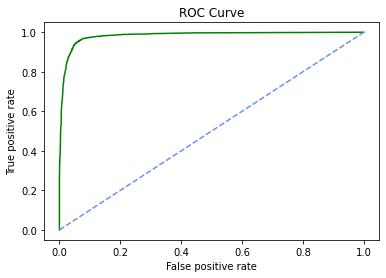

In [33]:
plt.plot(metrics['roc_curve']['fpr'],
        metrics['roc_curve']['tpr'],
        color = 'green')
plt.plot([0,1],[0,1], 
         linestyle = '--',
         color = 'cornflowerblue')
plt.title('ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()